In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:
from keras.layers import Dense, Activation

In [3]:
from keras.models import Sequential

In [4]:
from keras.optimizers import Adam

In [5]:
from keras.datasets import mnist

In [8]:
df = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [12]:
len(df)

2

In [13]:
(X_train, y_train), (X_test, y_test) = df

In [14]:
unique, counts = np.unique(y_train, return_counts=True)
print('Trian labels:', dict(zip(unique, counts)))

unique, counts = np.unique(y_test, return_counts=True)
print('Test labels:', dict(zip(unique, counts)))

Trian labels: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels: {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [15]:
X_train.shape

(60000, 28, 28)

In [16]:
y_train.shape

(60000,)

In [18]:
idx = np.random.randint(0, X_train.shape[0], size =25)

In [19]:
images = X_train[idx]
labels = y_train[idx]

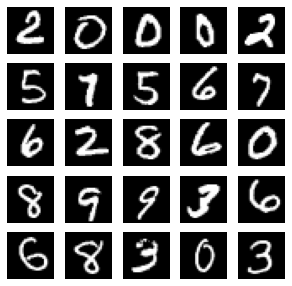

In [21]:
plt.figure(figsize = (5,5))
for i in range(len(idx)):
  plt.subplot(5,5, i+1)
  image = images[i]
  plt.imshow(image, cmap = 'gray')
  plt.axis('off')

plt.show()

In [22]:
len(np.unique(y_train))

10

In [23]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [25]:
X_train = np.reshape(X_train, [-1, 28*28])

In [28]:
X_train = X_train/255


In [29]:
X_test = np.reshape(X_test, [-1, 28*28])
X_test = X_test/255

In [35]:
model = Sequential(
    [               
        tf.keras.Input(shape=(28*28,)), 
        Dense(256, activation = 'relu'),
        Dense(150, activation = 'relu'),
        Dense(50, activation = 'relu'),
        Dense(10, activation = 'softmax')
        
    ], name = "my_model" 
)

In [38]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [41]:
model.fit(X_train, y_train, epochs = 20, batch_size=256)

Epoch 1/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0118 - accuracy: 0.9965
Epoch 2/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0124 - accuracy: 0.9961
Epoch 3/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0087 - accuracy: 0.9970
Epoch 4/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0091 - accuracy: 0.9970
Epoch 5/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0126 - accuracy: 0.9956
Epoch 6/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0108 - accuracy: 0.9963
Epoch 7/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0062 - accuracy: 0.9978
Epoch 8/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0070 - accuracy: 0.9981
Epoch 9/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0035 - accuracy: 0.9989
Epoch 10/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0087 - accura

In [43]:
model.evaluate(X_test, y_test, batch_size= 128)

79/79 [==============================] - 1s 8ms/step - loss: 0.1104 - accuracy: 0.9810


[0.1104072630405426, 0.9810000061988831]